Own inversion
[[3.88202012]
 [3.10478698]]
sgdreg from scikit
[3.86628097] [3.09222757]
theta from own gd
[[3.88202012]
 [3.10478698]]
theta from own sdg
[[4.09191085]
 [2.92837482]]


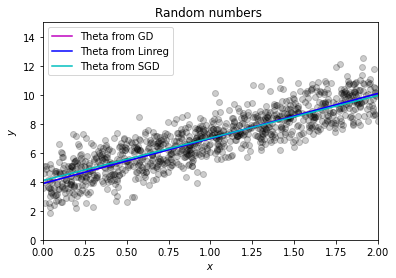

In [31]:
# Sketch of SGd based on code imported from the lecture week40 thursday

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

n_epochs = 1000

X = np.c_[np.ones((n,1)), x]
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(max_iter = n_epochs, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(2,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)



M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = M, n_epochs
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2.0* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

ypredict3 = Xnew.dot(theta)

plt.plot(x, y ,'ko', alpha=0.2)
plt.plot(xnew, ypredict, "m-", label="Theta from GD")
plt.plot(xnew, ypredict2, "b-", label="Theta from Linreg")
plt.plot(xnew, ypredict3, "c-", label="Theta from SGD")
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()
